# Model Evaluation

## Imports

In [45]:
# Core
import pandas as pd

# Model
import joblib

# Evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    average_precision_score, RocCurveDisplay, PrecisionRecallDisplay
)
import joblib

# Paths
from src.__00__paths import model_dir, figures_dir, docs_dir, curated_data_dir

# Config
sns.set_style("whitegrid")

## Load Test Data

In [46]:
test_df = pd.read_csv(curated_data_dir / "test.csv")

x_test = test_df.drop(columns=['loan_status'])
y_test = test_df['loan_status']

## Load Models

In [47]:
lr_model = joblib.load(model_dir / "LogisticRegression_model.joblib")
svm_model = joblib.load(model_dir / "SVM_model.joblib")

## Define Evaluate Method for Reusability

In [48]:
def evaluate_model(model, model_name):
    print(f"\n=== {model_name} Detailed Evaluation ===")

    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    # Metrics
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    print(report)
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

    # Save classification report to txt
    report_path = docs_dir / f"{model_name.replace(' ', '_')}_classification_report.txt"
    with open(report_path, "w") as f:
        f.write(f"{model_name} - Detailed Evaluation\n\n")
        f.write(report + "\n")
        f.write(f"ROC AUC: {roc_auc:.4f}\n")
        f.write(f"PR AUC: {pr_auc:.4f}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(figures_dir / f"{model_name.replace(' ', '_')}_confusion_matrix.png")
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{model_name} - ROC Curve")
    plt.tight_layout()
    plt.savefig(figures_dir / f"{model_name.replace(' ', '_')}_roc_curve.png")
    plt.show()

    # Precision-Recall Curve
    PrecisionRecallDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.tight_layout()
    plt.savefig(figures_dir / f"{model_name.replace(' ', '_')}_precision_recall_curve.png")
    plt.show()

    print(f"✔️  Plots Saved to {'/'.join(figures_dir.parts[-2:])}\n")
    print(f"✔️ Report Saved at {'/'.join(docs_dir.parts[-2:])}\n")

## Evaluate Logistic Regression Model


=== Logistic Regression Detailed Evaluation ===
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       318
           1       0.96      0.90      0.93       536

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.91       854
weighted avg       0.92      0.92      0.92       854

ROC AUC: 0.9682
PR AUC: 0.9838


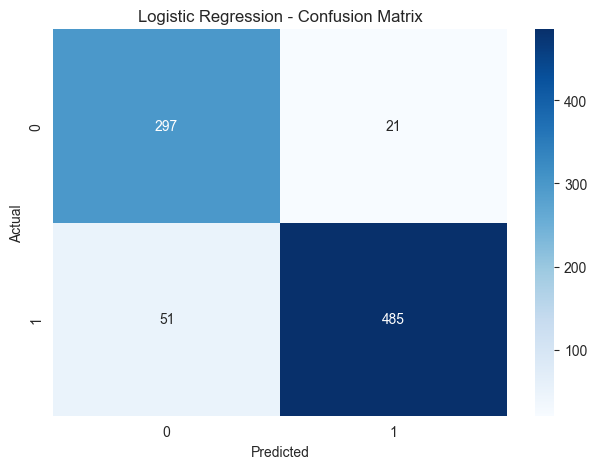

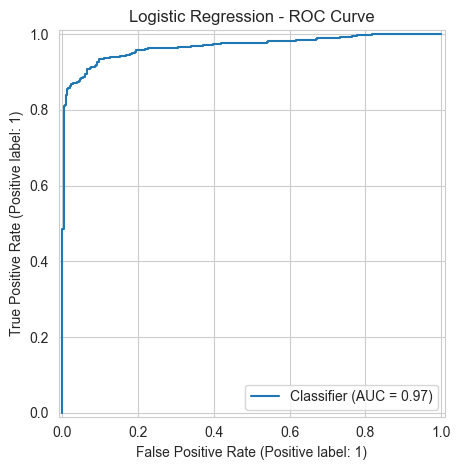

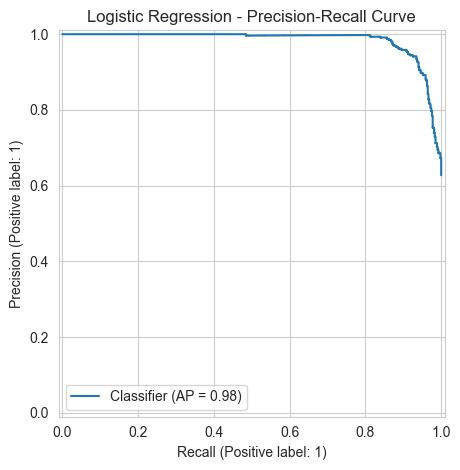

✔️  Plots Saved to outputs/figures

✔️ Report Saved at outputs/docs



In [49]:
evaluate_model(lr_model, "Logistic Regression")

## Evaluate SVM Model


=== SVM Detailed Evaluation ===
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       318
           1       0.96      0.94      0.95       536

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854

ROC AUC: 0.9886
PR AUC: 0.9932


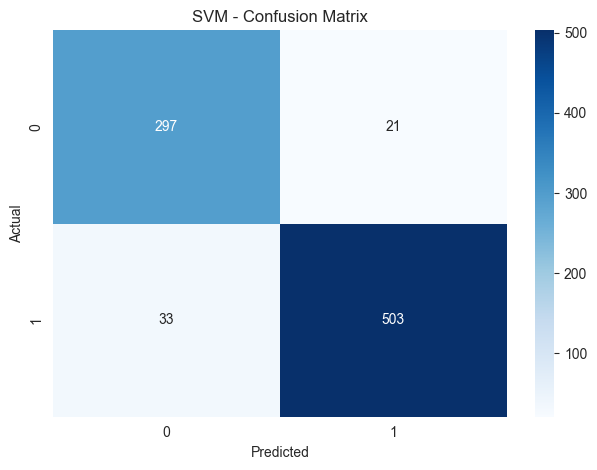

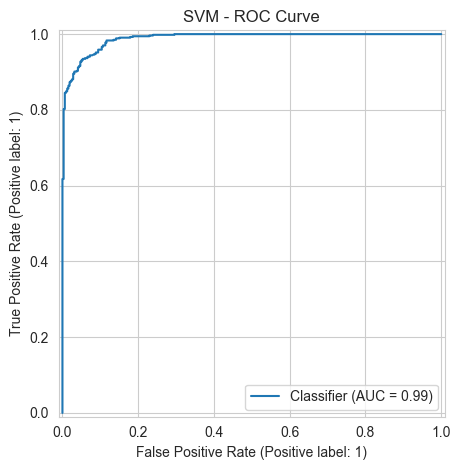

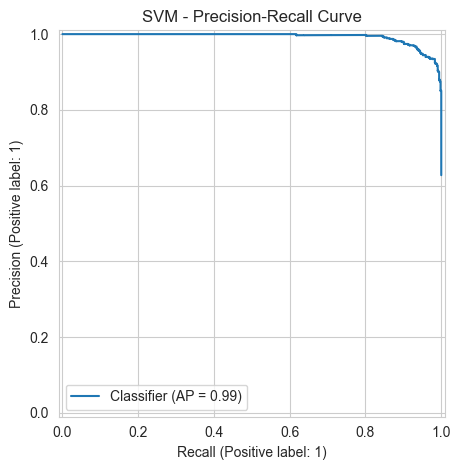

✔️  Plots Saved to outputs/figures

✔️ Report Saved at outputs/docs



In [50]:
evaluate_model(svm_model, "SVM")